# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

call metrics e.g. f1_score(XYZ)
attributes -- classifier.attribute -- clf3.coef_
methods e.g. predict -- clf3.predict(dev_data_counts)

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

/Users/sarahcha/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/sarahcha/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [129]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test//2:], newsgroups_test.target[num_test//2:]
dev_data, dev_labels = newsgroups_test.data[:num_test//2], newsgroups_test.target[:num_test//2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print ('training label shape:', train_labels.shape)
print ('test label shape:', test_labels.shape)
print ('dev label shape:', dev_labels.shape)
print ('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [33]:
## checking distribution of classes

import collections
collections.Counter(train_labels)


Counter({0: 480, 1: 584, 2: 593, 3: 377})

In [3]:
def P1(num_examples=10):
    
    for i in range(num_examples):
        print('Example Number:', i+1)
        print(train_data[i], '\n')
        print('Training label:', newsgroups_train.target_names[train_labels[i]], '\n')
P1()

Example Number: 1
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 

Training label: comp.graphics 

Example Number: 2


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for ce

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [4]:
#def P2():

### STUDENT START ###
count_vector = CountVectorizer()
Train_data_counts = count_vector.fit_transform(train_data)

### STUDENT END ###

#P2()

In [5]:
##2a)
##first calculate the total shape - # of words
x = Train_data_counts.shape

##then calculate # of non-zero words
y = Train_data_counts.nnz

## calculate fraction that is non-zero
print('{:.2%}'.format(y/(x[0]*x[1])))

0.36%


In [6]:
##2b: What are the 0th and last feature strings (in alphabetical order)? 
##Hint: use the vectorizer's get_feature_names function.

feature_names = count_vector.get_feature_names()
#print 0th feature string
print (sorted(feature_names)[0])
#print last feature string
print(sorted(feature_names)[-1])


00
zyxel


In [121]:
##2c Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. 
## Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

vocab_sub = ["atheism", "graphics", "space", "religion"]

##explicitly setting the vocabulary means no vocabulary is learned from the data
count_vector2c = CountVectorizer(vocabulary = vocab_sub)
Train_data_counts2c = count_vector2c.transform(train_data)

##calculate counts
x = Train_data_counts2c.shape
print("x:",x)
## returns a 2034 x 4 vector which makes sense given our vocabulary that we fit to the vector was of length 4.

##then calculate # of non-zero words
y = Train_data_counts2c.nnz
print(y)

## calculate fraction that is non-zero
per = y/(x[0]*x[1])
print('{:.2%}'.format(per))


x: (2034, 4)
546
6.71%


In [8]:
## 2d.Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. 
# What size vocabulary does this yield?
count_vector_2d = CountVectorizer(analyzer="char", ngram_range = (2,3))
Train_data_counts_2d = count_vector_2d.fit_transform(train_data)
Train_data_counts_2d.shape
## allowing extraction of bigrams and trigrams increases the size of vocabulary to 537,462.


(2034, 35478)

In [9]:
## 2e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. 
## What size vocabulary does this yield?
count_vector_2e = CountVectorizer(min_df = 10)
Train_data_counts_2e = count_vector_2e.fit_transform(train_data)
Train_data_counts_2e.shape

(2034, 3064)

In [10]:
## f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? 
## Hint: build a vocabulary for both train and dev and look at the size of the difference.

count_vector_2f = CountVectorizer()
Train_data_counts_2f = count_vector_2f.fit_transform(train_data)
train_2f = count_vector_2f.get_feature_names()

dev_count_vector_2f = CountVectorizer()
dev_data_counts_2f = dev_count_vector_2f.fit_transform(dev_data)
dev_features_2f = dev_count_vector_2f.get_feature_names()

    
missing = 0

for a in dev_features_2f:
    missing += 1.0*(a not in train_2f)
    fraction_missing = 1.0* missing/len(dev_features_2f)

print("Fraction of words in dev data missing: ",'{:.2%}'.format(fraction_missing))

Fraction of words in dev data missing:  24.79%


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

k: 1 f1_score: 38.31%
k: 2 f1_score: 39.64%
k: 3 f1_score: 41.42%
k: 4 f1_score: 39.50%
k: 5 f1_score: 42.31%
k: 6 f1_score: 44.23%
k: 7 f1_score: 44.38%
k: 8 f1_score: 44.08%
k: 9 f1_score: 43.05%
k: 10 f1_score: 42.16%
k: 11 f1_score: 41.86%
k: 12 f1_score: 41.42%
k: 13 f1_score: 42.31%
k: 14 f1_score: 42.16%


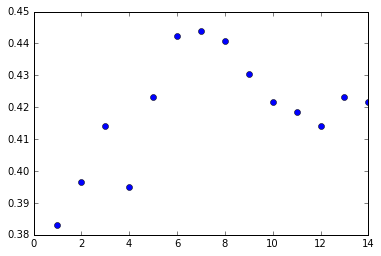

In [11]:
##Fitting to K-Nearest Neighbors

def KNN_fit(train, trainlabels, dev, devlabels, k):
    from sklearn.metrics import f1_score

    count_vector_3 = CountVectorizer()
    Train_data_counts_3 = count_vector_3.fit_transform(train)
    dev_data_counts_3 = count_vector_3.transform(dev)
    clf_3 = KNeighborsClassifier(n_neighbors = k).fit(Train_data_counts_3, trainlabels)
    predicted = clf_3.predict(dev_data_counts_3)

    score = f1_score(predicted, devlabels, average='micro')
    #print("k =", k, "f1_score:",'{:.2%}'.format(score))
    return score

for i in range(1,15):
    run = KNN_fit(train_data, train_labels, dev_data, dev_labels, i)
    print("k:",i, "f1_score:", '{:.2%}'.format(run))
    plt.plot(i, run, 'o', color ="blue")
plt.show()


#Answer to question 3a:
#k = 7 is the optimal K. 
#KNN finds a predefined number of training samples closest in distance to the new point and predicts the label from these neighbors. 
#KNN doesn't work as well on this problem because we have so many features (dimensions). Further given that we are
#trying to classify these training inputs into 4 distinct categories, only a small subset of
# words actually matter -- KNN doesn't have a mechanism to weight the words by importance. 

In [204]:
##Fitting to Multinomial Naive Bayes
from sklearn.metrics import f1_score

count_vector_3b = CountVectorizer()
Train_data_counts_3b = count_vector_3b.fit_transform(train_data)
dev_data_counts_3b = count_vector_3b.transform(dev_data)
clf_3b = MultinomialNB().fit(Train_data_counts_3b, train_labels)
predicted = clf_3b.predict(dev_data_counts_3b)

score = f1_score(predicted, dev_labels, average='micro')
print("score: ",'{:.2%}'.format(score))
##score = 78.11%


###check for optimal alpha
alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

#use GridSearchCV to find the best value for alpha
clf = GridSearchCV(MultinomialNB(), alphas, scoring = 'accuracy')
clf.fit(Train_data_counts_3b, train_labels).predict(dev_data_counts_3b)
print("optimal alpha: ",clf.best_params_)
### optimal alpha = 0.01

score:  78.11%


/Users/sarahcha/anaconda3/lib/python3.5/site-packages/sklearn/naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/sarahcha/anaconda3/lib/python3.5/site-packages/sklearn/naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/Users/sarahcha/anaconda3/lib/python3.5/site-packages/sklearn/naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


optimal alpha:  {'alpha': 0.01}


In [211]:
##Fitting to Logistic regression classifier
from sklearn.metrics import f1_score

count_vector_3c = CountVectorizer()
Train_data_counts_3c = count_vector_3c.fit_transform(train_data)
dev_data_counts_3c = count_vector_3c.transform(dev_data)
features_3c = count_vector_3c.get_feature_names()

clf_3c = LogisticRegression(solver = 'newton-cg').fit(Train_data_counts_3c, train_labels)
predicted = clf_3c.predict(dev_data_counts_3c)

score_3c = f1_score(predicted, dev_labels, average='micro')
print("Score: ",'{:.2%}'.format(score_3c))

###check for optimal C
C_val = {'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 10.0]}

#use GridSearchCV to find the best value for alpha
clf_3c2 = GridSearchCV(LogisticRegression(), C_val, scoring = 'accuracy')
clf_3c2.fit(Train_data_counts_3c, train_labels).predict(dev_data_counts_3c)
print("optimal C: ",clf_3c2.best_params_)


#b. Any ideas why logistic regression doesn't work as well as Naive Bayes?
# Logistic regression is essentially a neural network with no hidden layer. This means that with no non-linear activation
# function, it can only make linear decisions. This doesn't lend well to this to problem of classifying into genres 
# based on text data which is a non-linear decision. 

Score:  69.97%
optimal C:  {'C': 0.2}


In [18]:
#3c. Logistic regression estimates a weight vector for each class, which you can access with the
#coef_ attribute. Output the sum of the squared weight values for each class for each setting 
#of the C parameter. Briefly explain the relationship between the sum and the value of C.

C_val = [0.01, 0.1, 0.5, 1, 5]
for i in C_val:
    clf3 = LogisticRegression(solver = 'newton-cg', C=i).fit(Train_data_counts_3c, train_labels)
    sq_weight_vector = clf3.coef_**2
    sum_sq_weights = ['{:.2f}'.format(sum(i)) for i in sq_weight_vector]
    print ("C=", i)
    print(sum_sq_weights)

## C is the inverse of regularization strength. In other words, smaller values of C mean higher
# levels of regularization. This means that some of the coefficients are set to very low levels
# when higher levels of regularization is specified. This is commensurate with lower
# sum of squared weight values of coefficients for each class with C is lower. 

C= 0.01
['2.45', '2.98', '2.82', '2.03']
C= 0.1
['27.17', '24.76', '27.53', '22.90']
C= 0.5
['102.81', '83.20', '99.18', '89.01']
C= 1
['167.24', '130.95', '158.10', '145.76']
C= 5
['423.07', '322.58', '389.81', '377.74']


ANSWER:

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [208]:
#def P4():
def fit_lr(train, trainlabels, dev, devlabels):
    import pandas as pd
    
    count_vector_4= CountVectorizer()
    Train_data_counts_4= count_vector_4.fit_transform(train)
    dev_data_counts_4 = count_vector_4.transform(dev)
    clf_4 = LogisticRegression(C = 0.2).fit(Train_data_counts_4, trainlabels)
    predicted = clf_4.predict(dev_data_counts_4)

    weight_matrix = clf_4.coef_
    feature_names = count_vector_4.get_feature_names()
    feature_selection = []
    for i in weight_matrix:
        max_scores = np.argsort(np.array(i))[-5:][::-1]
        features = [feature_names[x] for x in max_scores]
        feature_selection.append(features)
    fs = np.array(feature_selection).flatten()
    count = np.zeros([20, 4])
    for r in range(count.shape[0]):
        for c in range(count.shape[1]):
            count[r, c] += round(weight_matrix[c][feature_names.index(fs[r])],2)
    fs = fs[:, np.newaxis]
    s = np.concatenate((fs, count), axis =1)
    pd_key_feats= pd.DataFrame(s)
    return pd_key_feats

fit_lr(train_data, train_labels, dev_data, dev_labels)

,0,1,2,3,4
0,bobby,0.62,-0.15,-0.22,-0.29
1,atheism,0.62,-0.27,-0.27,-0.31
2,religion,0.62,-0.38,-0.5,-0.02
3,atheists,0.61,-0.09,-0.2,-0.42
4,islam,0.53,-0.09,-0.21,-0.21
5,graphics,-0.5,1.26,-0.83,-0.47
6,image,-0.34,0.83,-0.49,-0.28
7,file,-0.21,0.81,-0.53,-0.37
8,3d,-0.23,0.71,-0.41,-0.24
9,computer,0.0,0.68,-0.43,-0.29


In [209]:
def bigram_compare(train, trainlabels, dev, devlabels):

    import pandas as pd

    #transform text into feature vector
    count_vector_4b = CountVectorizer(analyzer="word", ngram_range = (2,2))
    Train_data_counts_4b = count_vector_4b.fit_transform(train)
    dev_data_counts_4b = count_vector_4b.transform(dev)

    #fit data to logistic regression classifier
    clf_4b = LogisticRegression(C=0.2).fit(Train_data_counts_4b, trainlabels)

    #find the highest weights by class
    weight_matrix = clf_4b.coef_
    feature_names = count_vector_4b.get_feature_names()
    feature_selection = []
    for i in weight_matrix:
        max_scores = np.argsort(np.array(i))[-5:][::-1]
        features = [feature_names[x] for x in max_scores]
        feature_selection.append(features)
    fs = np.array(feature_selection).flatten()
    count = np.zeros([20, 4])

    #create matrix of the top 20 names
    for rows in range(count.shape[0]):
        for cols in range(count.shape[1]):
            count[rows, cols] += round(weight_matrix[cols][feature_names.index(fs[rows])],2)

    fs = fs[:, np.newaxis]
    s = np.concatenate((fs, count), axis =1)
    pd_key_feats= pd.DataFrame(s)

    return pd_key_feats
  
bigram_compare(train_data, train_labels, dev_data, dev_labels)

,0,1,2,3,4
0,cheers kent,0.42,-0.5,-0.48,0.42
1,claim that,0.4,-0.14,-0.19,-0.08
2,in this,0.36,-0.01,-0.37,-0.09
3,is not,0.35,-0.18,-0.35,0.03
4,are you,0.35,-0.19,-0.09,-0.21
5,looking for,-0.48,0.85,-0.37,-0.42
6,in advance,-0.36,0.65,-0.33,-0.32
7,out there,-0.22,0.59,-0.36,-0.21
8,is there,-0.24,0.55,-0.35,-0.17
9,comp graphics,-0.2,0.54,-0.27,-0.18


(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [90]:
source = "sarah sarah sarasdfja029309428fsdfsfsh"
compiled = re.compile(r'\b\w{20,}')
m = compiled.sub('abc', source)
print(m)

sarah sarah abc


In [25]:
source2 = "you're you're leash"
compiled2 = re.compile(r'\'re*')
m = compiled2.sub(" are", source2)
print(m)

you are you are leash


I am pleased to announce that a *revised version* of _The Easy-to-Read Book\nof Mormon_ (former title: _Mormon\'s Book_) by Lynn Matthews Anderson is now\navailable through anonymous ftp (see information below). In addition to the\nchange in title, the revised ETR BOM has been shortened by several pages\n(eliminating many extraneous "that\'s" and "of\'s"), and many (minor) errors\nhave been corrected. This release includes a simplified Joseph Smith Story,\ntestimonies of the three and eight witnesses, and a "Words-to-Know"\nglossary.\n\nAs with the previous announcement, readers are reminded that this is a\nnot-for-profit endeavor. This is a copyrighted work, but people are welcome\nto make *verbatim* copies for personal use. People can recuperate the\nactual costs of printing (paper, copy center charges), but may not charge\nanything for their time in making copies, or in any way realize a profit\nfrom the use of this book. See the permissions notice in the book itself\nfor the precise terms.\n\nNegotiations are currently underway with a Mormon publisher vis-a-vis the\nprinting and distribution of bound books. (Sorry, I\'m out of the wire-bound\n"first editions.") I will make another announcement about the availability\nof printed copies once everything has been worked out.\n\nFTP information: connect via anonymous ftp to carnot.itc.cmu.edu, then "cd\npub" (you won\'t see anything at all until you do).\n\n"The Easy-to-Read Book of Mormon" is currently available in postscript and\nRTF (rich text format). (ASCII, LaTeX, and other versions can be made\navailable; contact dba@andrew.cmu.edu for details.) You should be able to\nprint the postscript file on any postscript printer (such as an Apple\nLaserwriter); let dba know if you have any difficulties. (The postscript in\nthe last release had problems on some printers; this time it should work\nbetter.) RTF is a standard document interchange format that can be read in\nby a number of word processors, including Microsoft Word for both the\nMacintosh and Windows.

In [29]:
    stopwords = ['are' 'a', 'the', 'is', "he", "she", "you", "we", "yourself", "himself", "herself", "went", 
                 "like", "to", "be", "hello", "hi", "bye", "am", "how", "where", "who", "do", "did", "not", "was",
                "in", "out", "have", "had", "has", "such", "as", "for", "on", "some", "of", "my", "been", "some",
                 "may", "from", "way", "for", "in", "via", "any", "some", "many", "once", "but"]
    stopwords = sorted(stopwords)
    print(stopwords)

['am', 'any', 'area', 'as', 'be', 'been', 'but', 'bye', 'did', 'do', 'for', 'for', 'from', 'had', 'has', 'have', 'he', 'hello', 'herself', 'hi', 'himself', 'how', 'in', 'in', 'is', 'like', 'many', 'may', 'my', 'not', 'of', 'on', 'once', 'out', 'she', 'some', 'some', 'some', 'such', 'the', 'to', 'via', 'was', 'way', 'we', 'went', 'where', 'who', 'you', 'yourself']


In [290]:
    import re
    REMOVE_LIST = ['am', 'any', 'area', 'as', 'be', 'been', 'but', 'bye', 'did', 'do', 'for', 'for', 'from', 
                 'had', 'has', 'have', 'he', 'hello', 'herself', 'hi', 'himself', 'how', 'in', 'in', 'is', 'like', 
                 'many', 'may', 'my', 'not', 'of', 'on', 'once', 'out', 'she', 'some', 'some', 'some', 'such', 'the', 
                 'to', 'via', 'was', 'way', 'we', 'went', 'where', 'who', 'you', 'yourself']
    
    remove = '|'.join(REMOVE_LIST)
#    chunk_size = 1  # can tweak depending on size
#    for i in range(len(stopwords)):
#        pattern = R'\b(' + stopwords[i]+ ')\b\s*'
    pattern = re.compile(r'\b('+remove+r')\b', flags=re.IGNORECASE)
    stopwords_regex_list.append(re.compile(pattern))

     #   (re.compile(r'\b(' + r'|'.join(stopwords_slice))+ r')\b)
        
    print(stopwords_regex_list)

[re.compile('\\b(am)\x08\\s*'), re.compile('\\b(any)\x08\\s*'), re.compile('\\b(area)\x08\\s*'), re.compile('\\b(as)\x08\\s*'), re.compile('\\b(be)\x08\\s*'), re.compile('\\b(been)\x08\\s*'), re.compile('\\b(but)\x08\\s*'), re.compile('\\b(bye)\x08\\s*'), re.compile('\\b(did)\x08\\s*'), re.compile('\\b(do)\x08\\s*'), re.compile('\\b(for)\x08\\s*'), re.compile('\\b(for)\x08\\s*'), re.compile('\\b(from)\x08\\s*'), re.compile('\\b(had)\x08\\s*'), re.compile('\\b(has)\x08\\s*'), re.compile('\\b(have)\x08\\s*'), re.compile('\\b(he)\x08\\s*'), re.compile('\\b(hello)\x08\\s*'), re.compile('\\b(herself)\x08\\s*'), re.compile('\\b(hi)\x08\\s*'), re.compile('\\b(himself)\x08\\s*'), re.compile('\\b(how)\x08\\s*'), re.compile('\\b(in)\x08\\s*'), re.compile('\\b(in)\x08\\s*'), re.compile('\\b(is)\x08\\s*'), re.compile('\\b(like)\x08\\s*'), re.compile('\\b(many)\x08\\s*'), re.compile('\\b(may)\x08\\s*'), re.compile('\\b(my)\x08\\s*'), re.compile('\\b(not)\x08\\s*'), re.compile('\\b(of)\x08\\s*'), re

In [83]:
source = "you are my favorite went any where some sarah"

for regex in stopwords_regex_list:
    words = regex.sub('', source)

print(words)

you are my favorite went any where some sarah


In [ ]:

source ="aaabbbcccddddeefffgggg"
compiled_pattern10 = re.compile(r'[bcdfghjklmnpqrstvwxyz]{4,}')
x  = compiled_pattern10.sub('', source)
print(x)

In [ ]:
print(count_vector_5.get_feature_names())

In [ ]:
#def empty_preprocessor(s):
#    return s

#def better_preprocessor(s):
import re
#import nltk
#nltk.download()

def processor(source):
    
    from nltk.tokenize import sent_tokenize, word_tokenize

    
    lower = lambda x: x.group().lower()
    
    compiled_pattern1 = re.compile(r'([A-Z])(.*)')
    compiled_pattern2 = re.compile(r'\'s*')
    compiled_pattern3 = re.compile(r'\'re*')
    compiled_pattern4 = re.compile(r'[#@!$%^.!?&*_()/<>-]+')
    compiled_pattern5 = re.compile(r'[0-9]{2,}')
    compiled_pattern6 = re.compile(r'([0-9]+)([a-z]+)')
    compiled_pattern7 = re.compile(r'([a-z]+)([0-9]+)')
    compiled_pattern8 = re.compile(r'\b\w{15,}\b')
    compiled_pattern9 = re.compile(r'\b(\w+)( \1\b)+')
    compiled_pattern10 = re.compile(r'(.)\1{3,}')
    compiled_pattern11 = re.compile(r'[bcdfghjklmnpqrstvwxyz]{4,}')

    source_1 = compiled_pattern1.sub(lower, source)
    source_2 = compiled_pattern2.sub(' is', source_1)
    source_3 = compiled_pattern3.sub(' are', source_2)
    source_4 = compiled_pattern4.sub('', source_3)
    source_5 = compiled_pattern5.sub('', source_4)
    source_6 = compiled_pattern6.sub(r'\2', source_5)
    source_7 = compiled_pattern7.sub(r'\1', source_6)
    source_8 = compiled_pattern8.sub('', source_7)
    source_9 = compiled_pattern9.sub(r'\1', source_8)
    source_10 = compiled_pattern10.sub(r'\1', source_9)
    source_11 = compiled_pattern11.sub('', source_10)
    source_12 = word_tokenize(source_11)
    
    return source_11

count_vector_5 = CountVectorizer(preprocessor = processor)
Train_data_counts_5 = count_vector_5.fit_transform(train_data)
dev_data_counts = count_vector_5.transform(dev_data)

#fit data to logistic regression classifier
clf_5 = LogisticRegression(solver = 'newton-cg', C = 0.2).fit(Train_data_counts_5, train_labels)
predicted = clf_5.predict(dev_data_counts)

##scoring
features_5 = count_vector_5.get_feature_names()
print("the preprocessor reduced # of features by: ",len(features_3c)-len(features_5))
score_5 = f1_score(predicted, dev_labels, average='micro')
print("score improved by ",'{:.2%}'.format(score_5 - score_3c))


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

In [214]:
#def P6():

count_vector_6 = CountVectorizer(preprocessor = processor)
Train_data_counts_6 = count_vector_6.fit_transform(train_data)
dev_data_counts_6 = count_vector_6.transform(dev_data)
#print(Train_data_counts_6.shape)

#fit data to logistic regression classifier using an L1 penalty
clf_6 = LogisticRegression(penalty ='l1', C = 0.2, tol = 0.01).fit(Train_data_counts_6, train_labels)
predicted = clf_6.predict(dev_data_counts_6)
score_6 = f1_score(predicted, dev_labels, average='weighted')
print("with L1 regularization",'{:.2%}'.format(score_6))

##output # of learned weights not equal to zero
weights_6 = np.array(clf_6.coef_)
non_zero_wgts = np.sum(np.sum(weights_6, axis = 0)>0)
print("non zero weights under L1 regularization",non_zero_wgts)

##6a: compare results with an L2 regularization
clf_6a = LogisticRegression(solver = 'newton-cg', penalty ='l2', C = 0.2, tol = 0.01).fit(Train_data_counts_6, train_labels)
predicted_6a = clf_6a.predict(dev_data_counts_6)

score_6a = f1_score(predicted_6a, dev_labels, average='weighted')
print("with L2 regularization:",'{:.2%}'.format(score_6a))
weights_6a = np.array(clf_6a.coef_)

non_zero_wgts_6a = np.sum(np.sum(weights_6a, axis = 0)>0.0)
print("non zero weights under L2 regularization:",non_zero_wgts_6a)


with L1 regularization 68.95%
non zero weights under L1 regularization 246
with L2 regularization: 70.85%
non zero weights under L2 regularization: 12065


In [215]:
##6 part 2
##create matrix of the non-zero indices
def feature_sel(train, trainlabel, dev, devlabel, C, T):
    count_vector_6_2 = CountVectorizer(stop_words=None)
    Train_data_counts_6_2 = count_vector_6_2.fit_transform(train)
    dev_data_counts = count_vector_6_2.transform(dev)

    #fit data to logistic regression classifier using an L1 penalty
    clf_6_2 = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = C, tol = T).fit(Train_data_counts_6_2, trainlabel)
    predicted = clf_6_2.predict(dev_data_counts)
    score_6_2 = f1_score(predicted, devlabel, average='micro')
    features= count_vector_6_2.get_feature_names()
    weights_6_2 = np.array(clf_6_2.coef_)
    new_vocab = trim_vocab(weights_6_2, features)
    no_vocab = len(new_vocab)
    #print(score_6_2, no_vocab)
    #retrain the model with the new subset of vocabulary
#    count_vector_6b = CountVectorizer(Vocabulary = new_vocab)
    count_vector_6b = CountVectorizer(stop_words=None)
    count_vector_6b.fit(new_vocab)
    Train_data_counts_6b = count_vector_6b.transform(train)
    dev_data_counts = count_vector_6b.transform(dev)

    #fit data to logistic regression classifier using an L2 penalty
    clf_6b = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = C, tol = T).fit(Train_data_counts_6b, trainlabel)
    predicted = clf_6b.predict(dev_data_counts)
    score_6b = f1_score(predicted, devlabel, average='micro')
    return score_6b, no_vocab
#
def trim_vocab(weights, vocab_full):
    non_zero_wgts = np.sum(np.sum(weights, axis = 0)>0)
    weight_index = np.array(np.where(np.sum(weights, axis = 0)>0)).tolist()
    ##create list of subset of vocab with at least one non-zero weight across all classes
    vocab_subset = []
    for i in weight_index[0]:
        vocab_subset.append(vocab_full[i])
    return vocab_subset



score: 43.20% no vocab words: 6
score: 55.33% no vocab words: 38
score: 62.28% no vocab words: 76
score: 62.72% no vocab words: 101
score: 63.91% no vocab words: 145
score: 67.90% no vocab words: 247
score: 65.09% no vocab words: 345
score: 66.12% no vocab words: 408
score: 63.46% no vocab words: 478
score: 64.94% no vocab words: 559
score: 65.83% no vocab words: 611
score: 65.09% no vocab words: 628
score: 64.79% no vocab words: 694
score: 65.83% no vocab words: 687


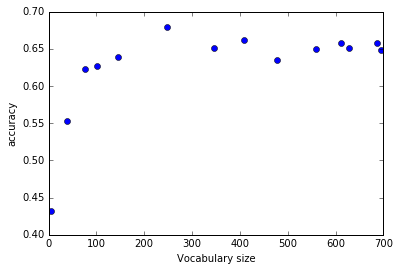

In [217]:
##Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused 
##features by adjusting the C parameter.
T = 0.01
C_set = [0.01, 0.03, 0.05, 0.07, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for i in C_set:
    abc = feature_sel(train = train_data, trainlabel = train_labels, dev = dev_data, devlabel = dev_labels, C=i, T=0.01)
    print("score:",'{:.2%}'.format(abc[0]), "no vocab words:", abc[1])
    plt.plot(abc[1], abc[0], 'o', color = 'blue')
plt.xlabel("Vocabulary size")
plt.ylabel("accuracy")
plt.show()


(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [219]:
## 7c. part 1: 
#"Use the TfidfVectorizer -- how is this different from the CountVectorizer?"
# ANSWER: TfidfVectorizer counts frequencies instead of occurrences to correct for the bias of longer documents have higher 
# occurrences of certain words.


from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfTransformer

#instantiate TfidfVectorizer()
count_vector_7 = TfidfVectorizer()
Train_data_counts_7 = count_vector_7.fit_transform(train_data)
dev_data_counts = count_vector_7.transform(dev_data)

#fit data to logistic regression classifier
clf_7 = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 100, tol = 0.01).fit(Train_data_counts_7, train_labels)
predicted = clf_7.predict(dev_data_counts)
score_7 = f1_score(predicted, dev_labels, average='micro')
print("score:",'{:.2%}'.format(score_7))


score: 76.33%


In [220]:
## calculate predicted probabilties from logistic regression
probs = np.array(clf_7.predict_proba(dev_data_counts))

## find the max probability of each example and the class of that max probability
max_prob = np.max(probs, axis=1)
max_prob_index = np.array(np.argmax(probs, axis = 1))


In [221]:
## construct np.array of probabilities of the correct class

correct_prob = np.zeros([dev_labels.shape[0],4])
correct_prob = correct_prob + 0.00001

for i in range(correct_prob.shape[0]):
    label = dev_labels[i]
    correct_prob[i][label] += 1


In [222]:
## construct an np.array that calculates the R ratio of maximum predicted probability
## to correct probability
R = np.choose(max_prob_index, probs.T)/np.choose(max_prob_index, correct_prob.T)
R_max = R.argsort()[-3:][::-1]
print(R_max)


[215 665 655]


Answer to 7: the examples with the highest R ratio are:
1) 215 - which is the classifier ascribes max probability to "talk.religion.misc" while the correct probability is "sci.space" resulting in an R ratio of 99382.
2) 665 - which is the classifier ascribes max probability to "talk.religion.misc" while the correct probability is "sci.space" resulting in an R ratio of 98001.
3) 655 - which is the classifier ascribes max probability to "alt.atheism" while the correct probability is "sci.space" resulting in an R ratio of 97452. 

Because T-fidf counts term frequency in an example it can calculate a high weight for a particular for a given label and enough that it will cause the prediction when that feature is preset to always go to that label.  In examples 215 and 665, both make mention of the musical "The Book of Mormon" which the classifier classifies as "religion" given the word 'Mormon' even though in this case it references a satirical musical. In example 655 the writer makes an offhanded comment with several "trigger" words commonly associated with religion - " (barring the theistic response about the Bible being \ndivinely inspired which I can\'t adequately argue)" and gets classified as atheism even though the bulk of the body has nothing to do with this comment. 


In [223]:
##print examples with the 3 largest R ratios:
np.take(dev_data, R_max)

array([ 'I am pleased to announce that a *revised version* of _The Easy-to-Read Book\nof Mormon_ (former title: _Mormon\'s Book_) by Lynn Matthews Anderson is now\navailable through anonymous ftp (see information below). In addition to the\nchange in title, the revised ETR BOM has been shortened by several pages\n(eliminating many extraneous "that\'s" and "of\'s"), and many (minor) errors\nhave been corrected. This release includes a simplified Joseph Smith Story,\ntestimonies of the three and eight witnesses, and a "Words-to-Know"\nglossary.\n\nAs with the previous announcement, readers are reminded that this is a\nnot-for-profit endeavor. This is a copyrighted work, but people are welcome\nto make *verbatim* copies for personal use. People can recuperate the\nactual costs of printing (paper, copy center charges), but may not charge\nanything for their time in making copies, or in any way realize a profit\nfrom the use of this book. See the permissions notice in the book itself\nfor t

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

In [38]:

#215
np.take(dev_data, R_max[1])

'I am pleased to announce that a *revised version* of _The Easy-to-Read Book\nof Mormon_ (former title: _Mormon\'s Book_) by Lynn Matthews Anderson is now\navailable through anonymous ftp (see information below). In addition to the\nchange in title, the revised ETR BOM has been shortened by several pages\n(eliminating many extraneous "that\'s" and "of\'s"), and many (minor) errors\nhave been corrected. This release includes a simplified Joseph Smith Story,\ntestimonies of the three and eight witnesses, and a "Words-to-Know"\nglossary.\n\nAs with the previous announcement, readers are reminded that this is a\nnot-for-profit endeavor. This is a copyrighted work, but people are welcome\nto make *verbatim* copies for personal use. People can recuperate the\nactual costs of printing (paper, copy center charges), but may not charge\nanything for their time in making copies, or in any way realize a profit\nfrom the use of this book. See the permissions notice in the book itself\nfor the preci

In [231]:
probs[665]

array([ 0.00290268,  0.98001686,  0.01408811,  0.00299234])

In [232]:
correct_prob[665]

array([  1.00000000e-05,   1.00000000e-05,   1.00000000e-05,
         1.00001000e+00])

In [234]:
probs[665][1]/correct_prob[665][1]

98001.686356850478